In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houses = pd.read_csv('2017SINGLEFAMILYSF.csv')

In [3]:
houses = houses[houses['Council District'] == 18]

In [4]:
houses.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea
92620,104024E00100CO,USD,18,119 A 30TH AVE S,NASHVILLE,37212,275500,424200,699700,279880,2360.00000
92621,104024E00200CO,USD,18,119 B 30TH AVE S,NASHVILLE,37212,275500,468900,744400,186100,2858.80005
92622,104024E00300CO,USD,18,119 C 30TH AVE S,NASHVILLE,37212,275500,467900,743400,297360,2858.80005
93074,10406008900,USD,18,214 FAIRFAX AVE,NASHVILLE,37212,319000,778300,1097300,274325,4338.00000
93075,10406009000,USD,18,216 FAIRFAX AVE,NASHVILLE,37212,319000,397900,716900,179225,2594.00000


In [5]:
houses_sample = houses.sample(n = 20)

In [6]:
houses_sample = houses_sample.rename(columns = {'2017 TOTAL APPR': 'price', 'FinishedArea': 'area'})

In [7]:
houses_sample.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,price,2017 TOTAL ASSD,area
110477,117030B20000CO,USD,18,2601 HILLSBORO PIKE M-10,NASHVILLE,37212,25000,92000,117000,46800,600.00000
93232,104060A06100CO,USD,18,3415 WEST END AVE A-701,NASHVILLE,37203,35000,108100,143100,35775,816.00000
95739,10414031000,USD,18,2810 A WESTWOOD AVE,NASHVILLE,37212,174000,130400,304400,76100,1248.00000
96099,10415004500,USD,18,2528 ASHWOOD AVE,NASHVILLE,37212,290000,857700,1147700,286925,4312.00000
94666,10411026000,USD,18,2508 ESSEX PL,NASHVILLE,37212,319000,435600,754600,188650,3086.80005


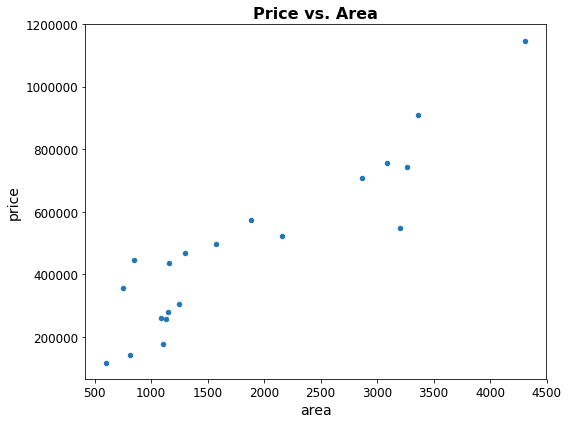

In [45]:
fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('scatter.png');

In [9]:
houses_sample.price.mean()

482290.0

In [11]:
import statsmodels.api as sm

In [12]:
X = houses_sample[['area']]

In [13]:
X = sm.add_constant(X)
y = houses_sample[['price']]

/home/michael/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
ols = sm.OLS(y, X)

In [17]:
res = ols.fit()

In [18]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     95.66
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.26e-08
Time:                        14:01:20   Log-Likelihood:                -259.44
No. Observations:                  20   AIC:                             522.9
Df Residuals:                      18   BIC:                             524.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.952e+04   4.88e+04      1.424      0.172    -3.3e+04    1.72e+05
area         223.6582     22.868      9.781      0.000     175.615     271.701
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.391
Skew:                          -0.214   Prob(JB):                        0.822
Kurtosis:                       2.464   Cond. No.                     4.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
res.params

const    69522.407856
area       223.658205
dtype: float64

In [24]:
import numpy as np

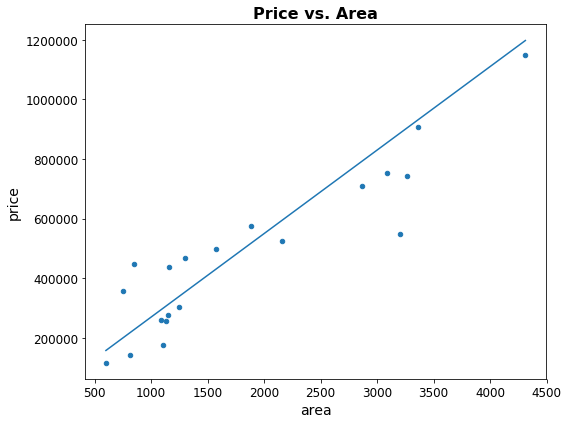

In [43]:
m = 280
b = -10000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('ols_01.png');

In [46]:
from matplotlib import collections  as mc

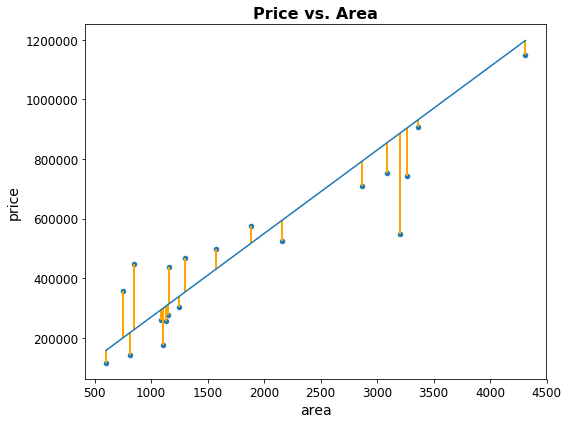

In [48]:
m = 280
b = -10000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('resid_01.png');


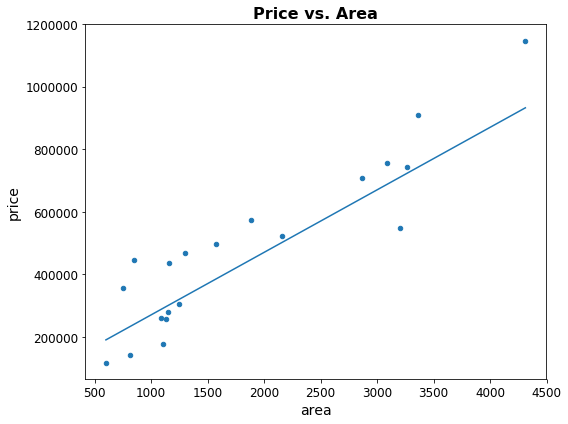

In [51]:
m = 200
b = 70000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('ols_02.png');


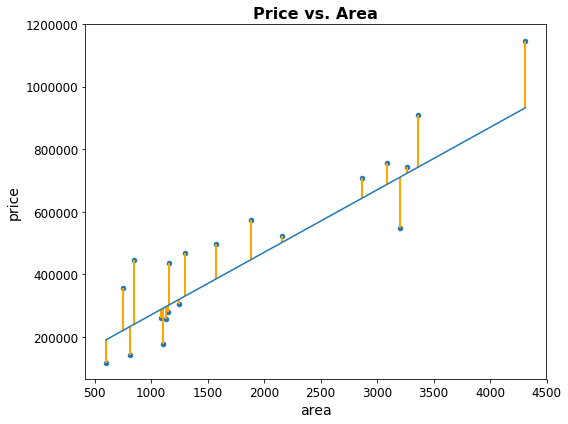

In [50]:
m = 200
b = 70000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('resid_02.png');


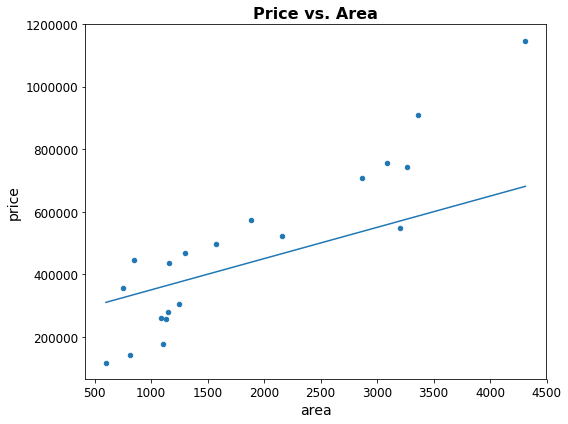

In [42]:
m = 100
b = 250000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('ols_03.png');


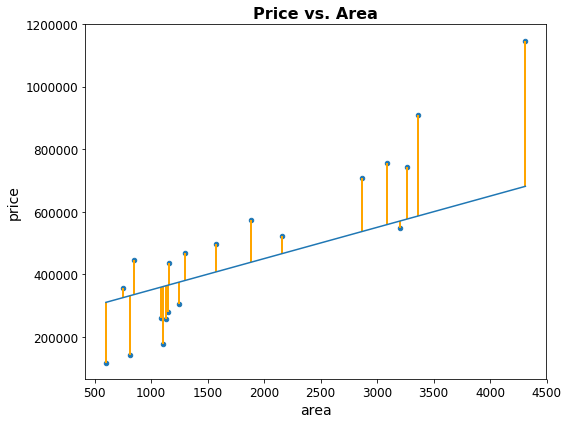

In [57]:
m = 100
b = 250000 

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('resid_03.png');


In [58]:
res.params

const    69522.407856
area       223.658205
dtype: float64

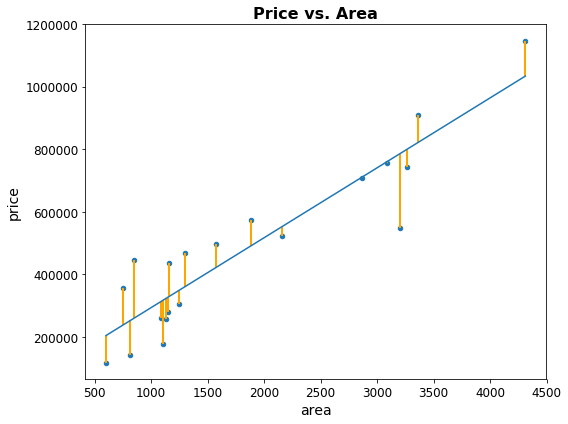

In [60]:
m = res.params['area']
b = res.params['const']

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('resid_04.png');


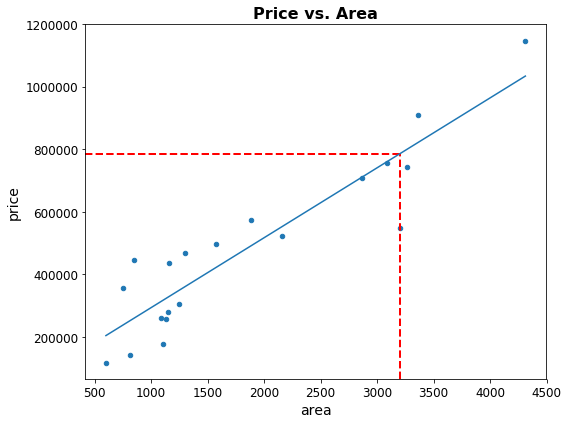

In [67]:
m = res.params['area']
b = res.params['const']

area = 3200
predicted_price = m*area + b

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

lines = [[(area,plt.ylim()[0]),(area,predicted_price)], 
         [(plt.xlim()[0], predicted_price), (area, predicted_price)]]
lc = mc.LineCollection(lines, linewidths=2, colors = 'red', linestyle = '--')

ax.add_collection(lc)

plt.title('Price vs. Area', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('pred_01.png');


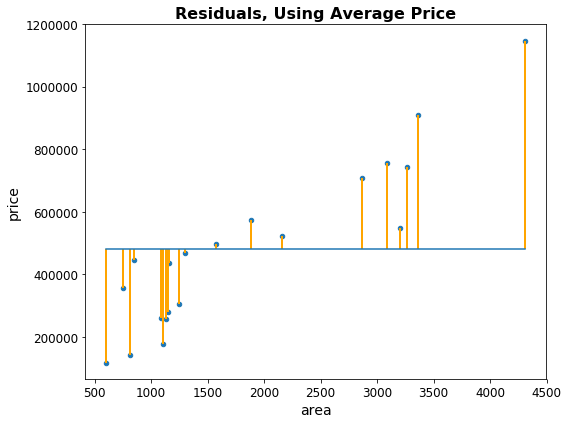

In [71]:
m = res.params['area']
b = res.params['const']

m = 0
b = houses_sample.price.mean()

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Residuals, Using Average Price', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('r2_01.png');

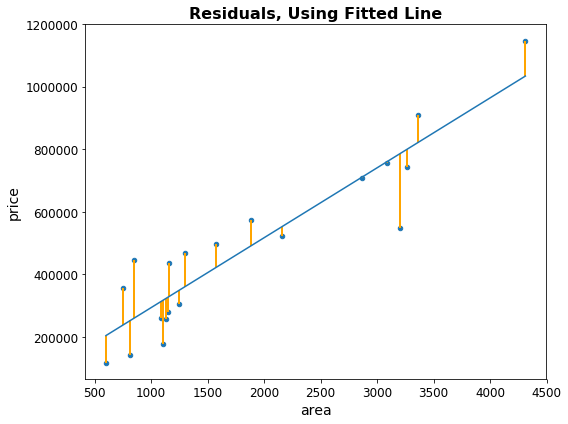

In [70]:
m = res.params['area']
b = res.params['const']

x = np.linspace(start = houses_sample.area.min(), stop = houses_sample.area.max(), num = 50)
y = m*x + b

lines = [[(x,y),(x,m*x + b)] for x,y in zip(houses_sample.area.values,houses_sample.price.values)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'orange')

fig, ax = plt.subplots(figsize = (8,6))
houses_sample.plot(kind = 'scatter', x = 'area', y = 'price', ax = ax)
plt.plot(x, y)

ax.add_collection(lc);

plt.title('Residuals, Using Fitted Line', fontsize = 16, fontweight = 'bold')
plt.ylabel('price', fontsize = 14)
plt.xlabel('area', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.tight_layout()
plt.savefig('r2_02.png');


In [72]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     95.66
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.26e-08
Time:                        15:14:41   Log-Likelihood:                -259.44
No. Observations:                  20   AIC:                             522.9
Df Residuals:                      18   BIC:                             524.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.952e+04   4.88e+04      1.424      0.172    -3.3e+04    1.72e+05
area         223.6582     22.868      9.781      0.000     175.615     271.701
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.391
Skew:                          -0.214   Prob(JB):                        0.822
Kurtosis:                       2.464   Cond. No.                     4.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""